<a href="https://colab.research.google.com/github/subhash505/new-repository/blob/master/jm_clt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Generating Random sample data in Normal Distribustion form

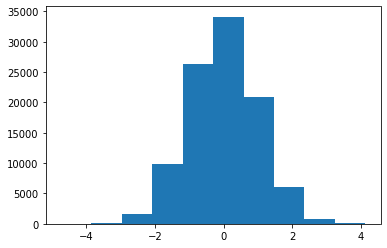

In [ ]:
sample_data = np.random.normal(size=100000)  
plt.hist(sample_data)
plt.show()  #to plot histogram without axis



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


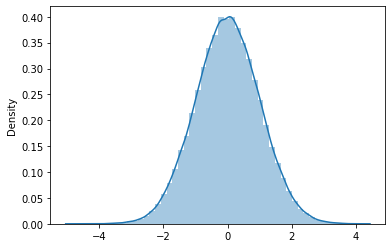

In [ ]:
sns.distplot(sample_data)
#sns.displot(sample_data)

# Normal Dist sample data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


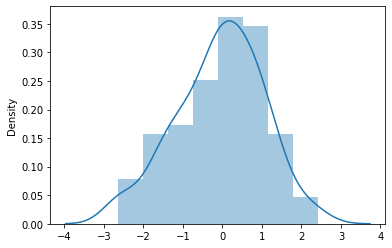

In [ ]:
sample_data = np.random.normal(size=100)
sns.distplot(sample_data)  

# Uniform Dist sample data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


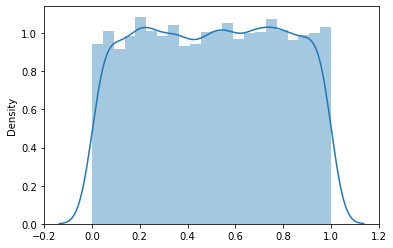

In [ ]:
sample_data= np.random.uniform(size=10000)
sns.distplot(sample_data)

Point Estimates

In [ ]:
from scipy.stats import poisson

In [ ]:
np.random.seed(10)
population_ages1 =poisson.rvs(loc=18, mu=35, size=150000)  # 
population_ages2 =poisson.rvs(loc=18, mu=10, size=100000)  #

population_ages = np.concatenate((population_ages1, population_ages2))  # concat

population_ages.mean() # what is the true mean age of the population of 250000  people?

43.002372

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a=population_ages, size=500) # Sample 500 values

sample_ages.mean() # Show sample mean     point estimate

42.388

In [ ]:
population_ages.mean() - sample_ages.mean()

0.614372000000003

In [ ]:
import random

In [ ]:
import pandas as pd
import scipy.stats as stats


Studying Sampling distribution

-0.12008483603917186


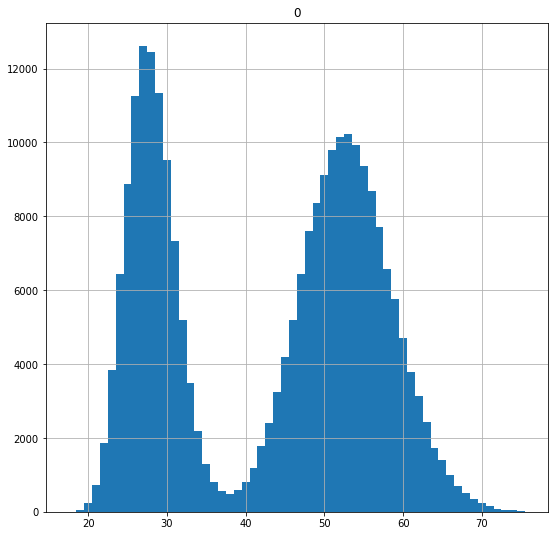

In [ ]:

pd.DataFrame(population_ages).hist(bins=58,range=(17.5,75.5),figsize=(9,9))

print( stats.skew(population_ages) )

-0.056225282585406065


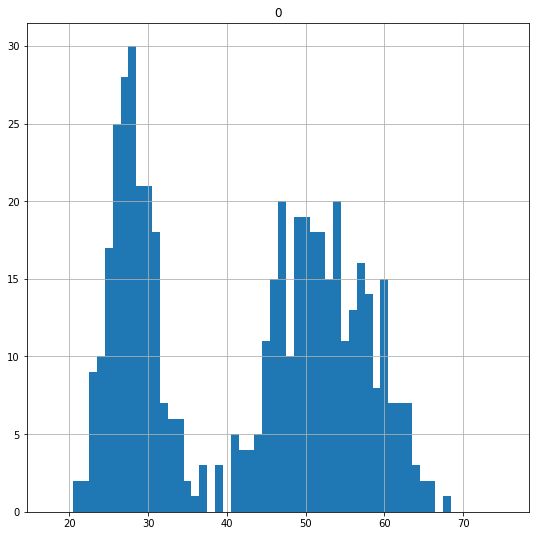

In [ ]:
pd.DataFrame(sample_ages).hist(bins=58,range=(17.5,75.5),figsize=(9,9))

print( stats.skew(sample_ages) )

create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean:

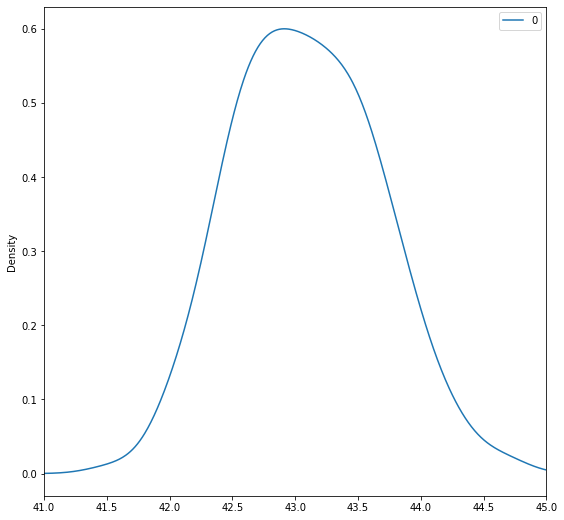

In [ ]:
np.random.seed(10)     #CLT THEOREM 

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )         # collecting the sample mean for every sample in a max generation of 200 samples
    
pd.DataFrame(point_estimates).plot(kind="density",  figsize=(9,9),xlim=(41,45))   

In [ ]:
#The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples were drawn from. 
#In addition, the mean of the sampling distribution approaches the true population mean

population_ages.mean() - np.array(point_estimates).mean()


-0.08440799999999626

# Confidence Intervals

In [ ]:
#S.D is known
sample_size = 1000

sample = np.random.choice(a= population_ages, size = sample_size)   #draw some random samples of size 1000

sample_mean = sample.mean()  #point estimate

print(sample_mean)

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*     #  area under curve  -----ppf   # con level  95%------1.96

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))      #MG= Z*SIGMA/SQ(N)

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)     #X-MG     ,X+MG 

print("Confidence interval:")
print(confidence_interval)

43.282
z-critical value:
1.959963984540054
Confidence interval:
(42.46206406882683, 44.101935931173166)


In [ ]:
sample_mean

43.282

In [ ]:
stats.norm.interval(alpha=0.95,    # Confidence level             
                    loc=sample_mean,     
                    scale=pop_stdev/math.sqrt(sample_size))  # Scaling factor

(42.46206406882683, 44.101935931173166)

T-distribution

In [ ]:
#SD is unknown
sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size) #
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*  df=n-1

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std()    # Get the sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate     MG= t*SIGMA/SQ(N)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.659096531075285, 47.46090346892472)


In [ ]:
# Check the difference between critical values with a sample size of 1000
             
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

In [ ]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.659096531075285, 47.46090346892472)

Confidence interval using Proportions

In [ ]:

#hispanic proportion estimate:                                      #z dist or normal dist
z_critical = stats.norm.ppf(0.975)      # Record z-critical value

p = 0.192                               # Point estimate of sample proportion

n = 1000                                # Sample size

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

confidence_interval = (p - margin_of_error,  p + margin_of_error) 

confidence_interval

(0.16758794241348748, 0.21641205758651252)

In [ ]:
stats.norm.interval(alpha = 0.95,    # Confidence level             
                   loc =  0.192,     # Point estimate of proportion
                   scale = math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)